In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

https://drive.google.com/drive/folders/1YnxDqNIqM2Xr1Dlgv5pYsE6dYJ9MGxcM?usp=sharing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tf data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

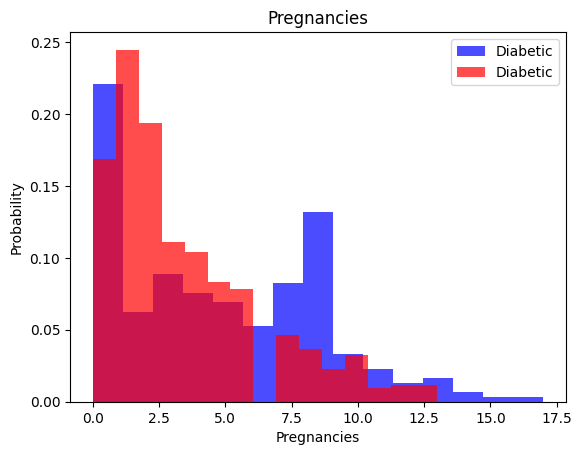

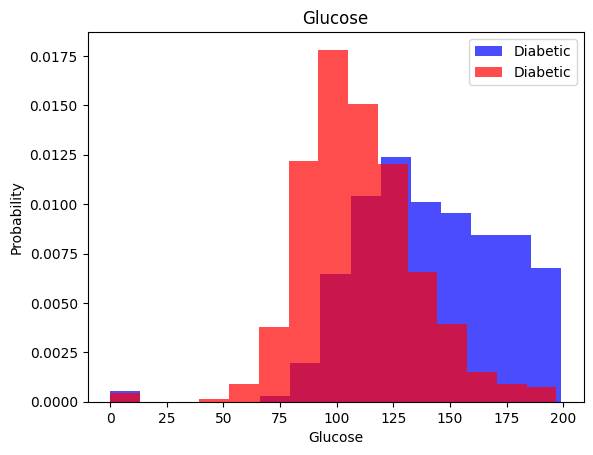

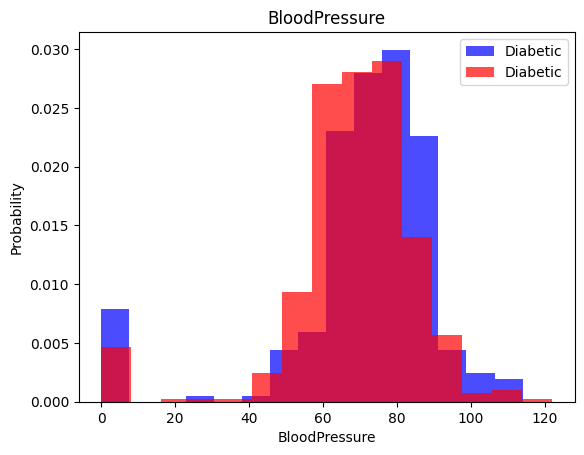

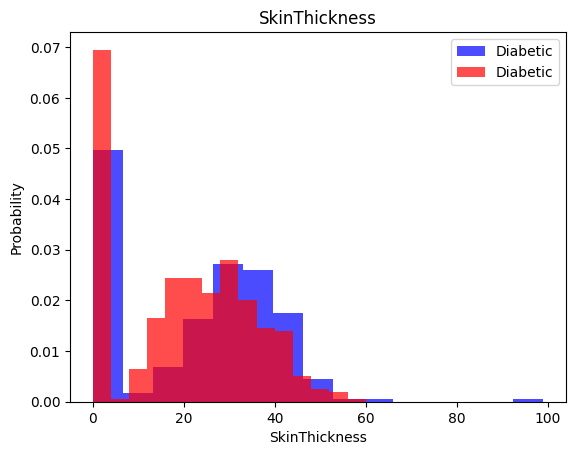

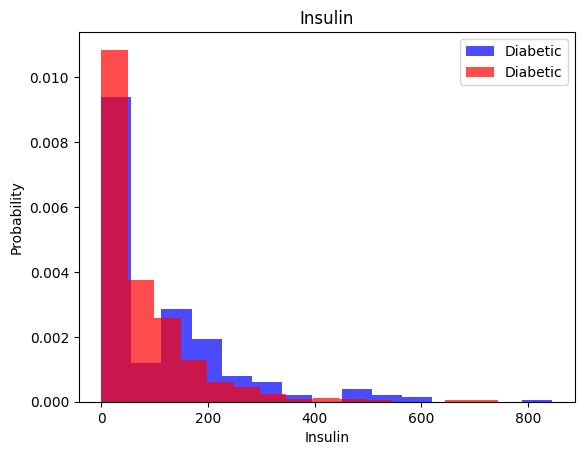

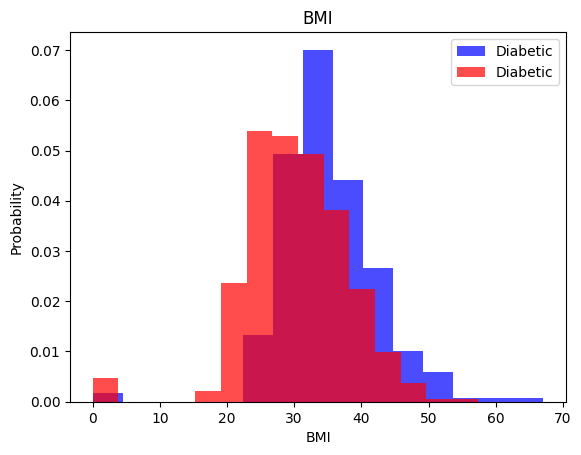

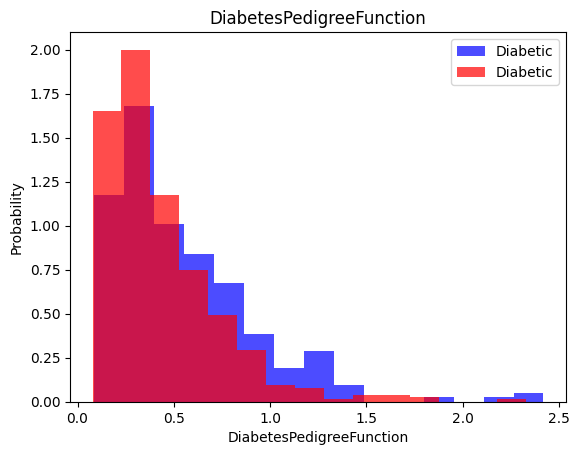

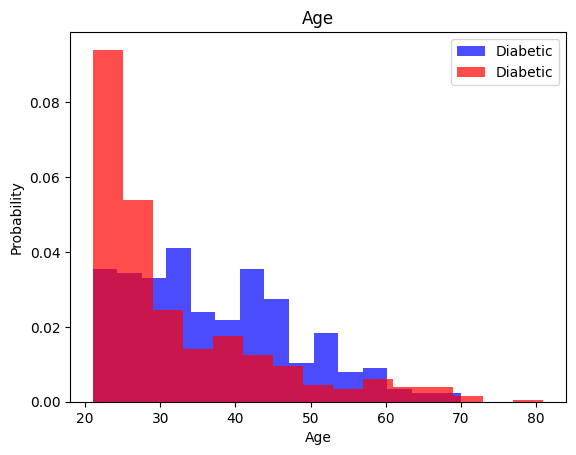

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetic', alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label='Diabetic', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X=df[df.columns[:-1]].values
y=df[df.columns[-1]].values
X.shape, y.shape

((768, 8), (768,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
over_sample = RandomOverSampler()
X, y = over_sample.fit_resample(X, y)

data = np.hstack((X, np.reshape(y, (-1, 1))))
new_df = pd.DataFrame(data, columns=df.columns)
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.545945,0.681519,0.096501,0.834060,-0.711987,0.086083,0.425956,1.395556,1.0
1,-0.874308,-1.226819,-0.211973,0.460935,-0.711987,-0.789127,-0.400741,-0.271670,0.0
2,1.114046,1.741706,-0.314797,-1.342507,-0.711987,-1.201725,0.560743,-0.183921,1.0
3,-0.874308,-1.105654,-0.211973,0.087809,0.042977,-0.601582,-0.951873,-1.149158,0.0
4,-1.158358,0.348317,-1.548693,0.834060,0.637310,1.273868,5.401114,-0.096173,1.0


In [ ]:
new_df['Outcome'].value_counts()

,count
Outcome,
1.0,500
0.0,500


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'Precision', 'Recall'])

In [34]:
model.fit(X_train, y_train, epochs=32, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - Precision: 0.5577 - Recall: 0.3076 - accuracy: 0.5442 - loss: 0.6889 - val_Precision: 0.6711 - val_Recall: 0.5484 - val_accuracy: 0.6650 - val_loss: 0.6231
Epoch 2/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.7434 - Recall: 0.6539 - accuracy: 0.7026 - loss: 0.6107 - val_Precision: 0.7126 - val_Recall: 0.6667 - val_accuracy: 0.7200 - val_loss: 0.5678
Epoch 3/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.7304 - Recall: 0.6824 - accuracy: 0.7196 - loss: 0.5701 - val_Precision: 0.7174 - val_Recall: 0.7097 - val_accuracy: 0.7350 - val_loss: 0.5315
Epoch 4/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.7349 - Recall: 0.7525 - accuracy: 0.7475 - loss: 0.5249 - val_Precision: 0.7188 - val_Recall: 0.7419 - val_accuracy: 0.7450 - val_loss: 0.5022
Epoch 5/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.7408 - Recall: 0.7208 - accuracy: 0.7257 - loss: 0.5098 - val_Precision: 0.7228 - val_Recall: 0.7849 -

In [35]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Precision: 0.8160 - Recall: 0.7315 - accuracy: 0.7737 - loss: 0.4499 


[0.48326489329338074,
 0.7599999904632568,
 0.7835051417350769,
 0.737864077091217]